# Import required libraries

In [1]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm

# Question 1
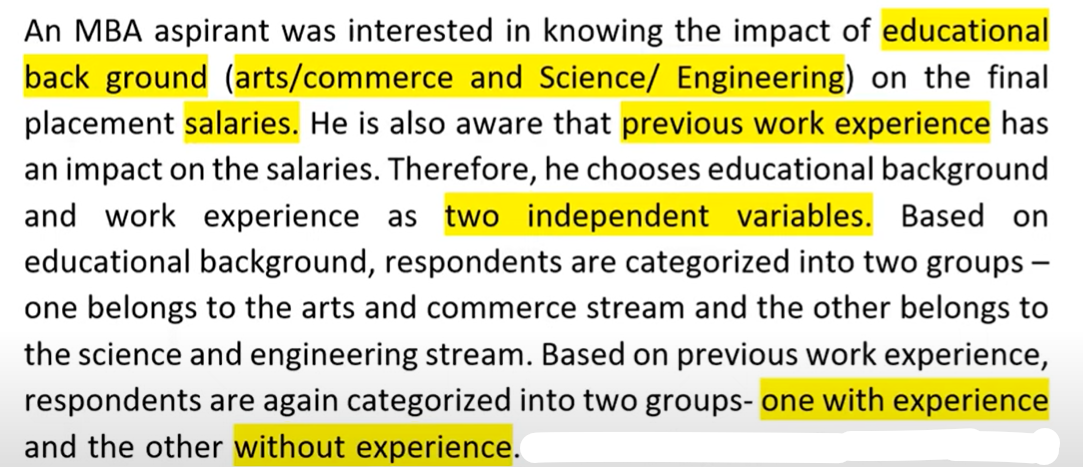

* Null hypothesis H0: Salary offered at placement is not affected by educational background
* Alternate hypothesis H1: Salary offered at placement is affected by educational background

#### Import data

In [17]:
df = pd.read_csv(r"C:\Users\Samir\Downloads\Placement_Data_Full_Class.csv")

In [18]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [22]:
from statsmodels.formula.api import ols


#### Perform ANOVA technique

In [23]:
ano = ols('salary ~ degree_t',data=df).fit()      #variable = ols(dependent variable~independent variable,data).fit

In [25]:
One_anova =sm.stats.anova_lm(ano,type=2)

In [26]:
One_anova

,df,sum_sq,mean_sq,F,PR(>F)
degree_t,2.0,3.821663e+10,1.910831e+10,2.224171,0.111834
Residual,145.0,1.245725e+12,8.591206e+09,NaN,NaN


##### Analyse the result:

* The F statistic and p-value turn out to be equal to 2.224171.00 and  0.111834 respectively. Since the p-value is greater than 0.05 hence we would accepting the null hypothesis. This implies that we have sufficient proof to say that salary offered in placement is not affected by educational background.

## QUESTION 2
*  Researchers took 20 cars of the same brand to take part in a study. These cars are randomly doped with one of the four-engine oils and allowed to run freely for 100 kilometers each. At the end of the journey, the performance of each of the cars is noted.Is there any proof to say that there exists a difference in the performance among four different engine oils.

* H0 (null hypothesis): mu1=mu2=mu3=mu4
* H1 (null hypothesis): There will be at least one population mean that differs from the rest

In [2]:
#Creating data groups for 4 different groups have applied different engine oil for each group.

# Performance when each of the engine
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

* Conduct the one-way ANOVA:
* Python provides us f_oneway() function from SciPy library using which we can conduct the One-Way ANOVA.

In [3]:
# Importing library
from scipy.stats import f_oneway

In [4]:
f_oneway(performance1, performance2, performance3, performance4)

F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)

##### Analyse the result:

* The F statistic and p-value turn out to be equal to 4.625 and 0.016336498 respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the performance among four different engine oils. 

##  Question 3
* Take a iris data. Check whether the different species have same petal width

* H0 (null hypothesis): mu1=mu2=mu3
* H1 (null hypothesis): There will be at least one population mean that differs from the rest

In [5]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [13]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df_anova = df1[['petal_width','species']]

In [8]:
df_anova

,petal_width,species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa
...,...,...
145,2.3,virginica
146,1.9,virginica
147,2.0,virginica
148,2.3,virginica


In [9]:
grps = pd.unique(df_anova.species.values)

In [10]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}

In [12]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [14]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [15]:
F, p

(960.007146801809, 4.169445839443116e-85)

##### Analyse the result:

* The F statistic and p-value turn out to be equal to 960.00 and  4.169445839443116e-85 respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the petal width among three different species. 